##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

### 0. Set up Workspace

In [1]:
import sys
sys.path.append('../')

In [2]:
######################## Load modules ###################################
%matplotlib inline
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc

In [3]:
####################### Set up directory structure ######################
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.analysis_parameters import get_CMIP_info
from plants_and_TCR.analysis_parameters import co2_concentrations
from plants_and_TCR.analysis_parameters import params
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.analyze_data import moving_average as movingaverage
from plants_and_TCR.process_data import calculate_tcr_time_series
from plants_and_TCR.process_data import calculate_pi_baseline
from plants_and_TCR.generate_figures import plot_scatter_CMIP

CDICT_NAMES=params.CDICT_NAMES
PATH_FIGURES = directory_information.DIR_OUTPUT_FIGURES
#PATH_DATA=directory_information.'/eos9/czarakas/Code/CMIP_Analysis/Data/Intermediate_Data/'

CO2_1PCTCO2 = co2_concentrations.co2_1pctco2
DEFAULT_VARNAME = params.DEFAULT_VARNAME
CDICT_NAMES = params.CDICT_NAMES
runnames_all = params.RUNNAMES_ALL
CMIP_linestyles = params.CMIP_LINESTYLES

In [4]:
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

### Calculate TCRs

In [ ]:
importlib.reload(calculate_tcr_time_series)
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['TOT-RAD','TOT', 'RAD','PHYS'],
                                                         average_types=['global'],
                                                         save_tcr_dict=True,
                                                         recalculate_TCRs=False)

In [5]:
# Load precalculated
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle', "rb"))

### 1. Figure 1a: Time Series

In [6]:
from plants_and_TCR.generate_figures import plot_climate_response_timeseries

/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_bokeh/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_bokeh/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/disk/p/czarakas/anaconda3/envs/plants_and_TCR_bokeh/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


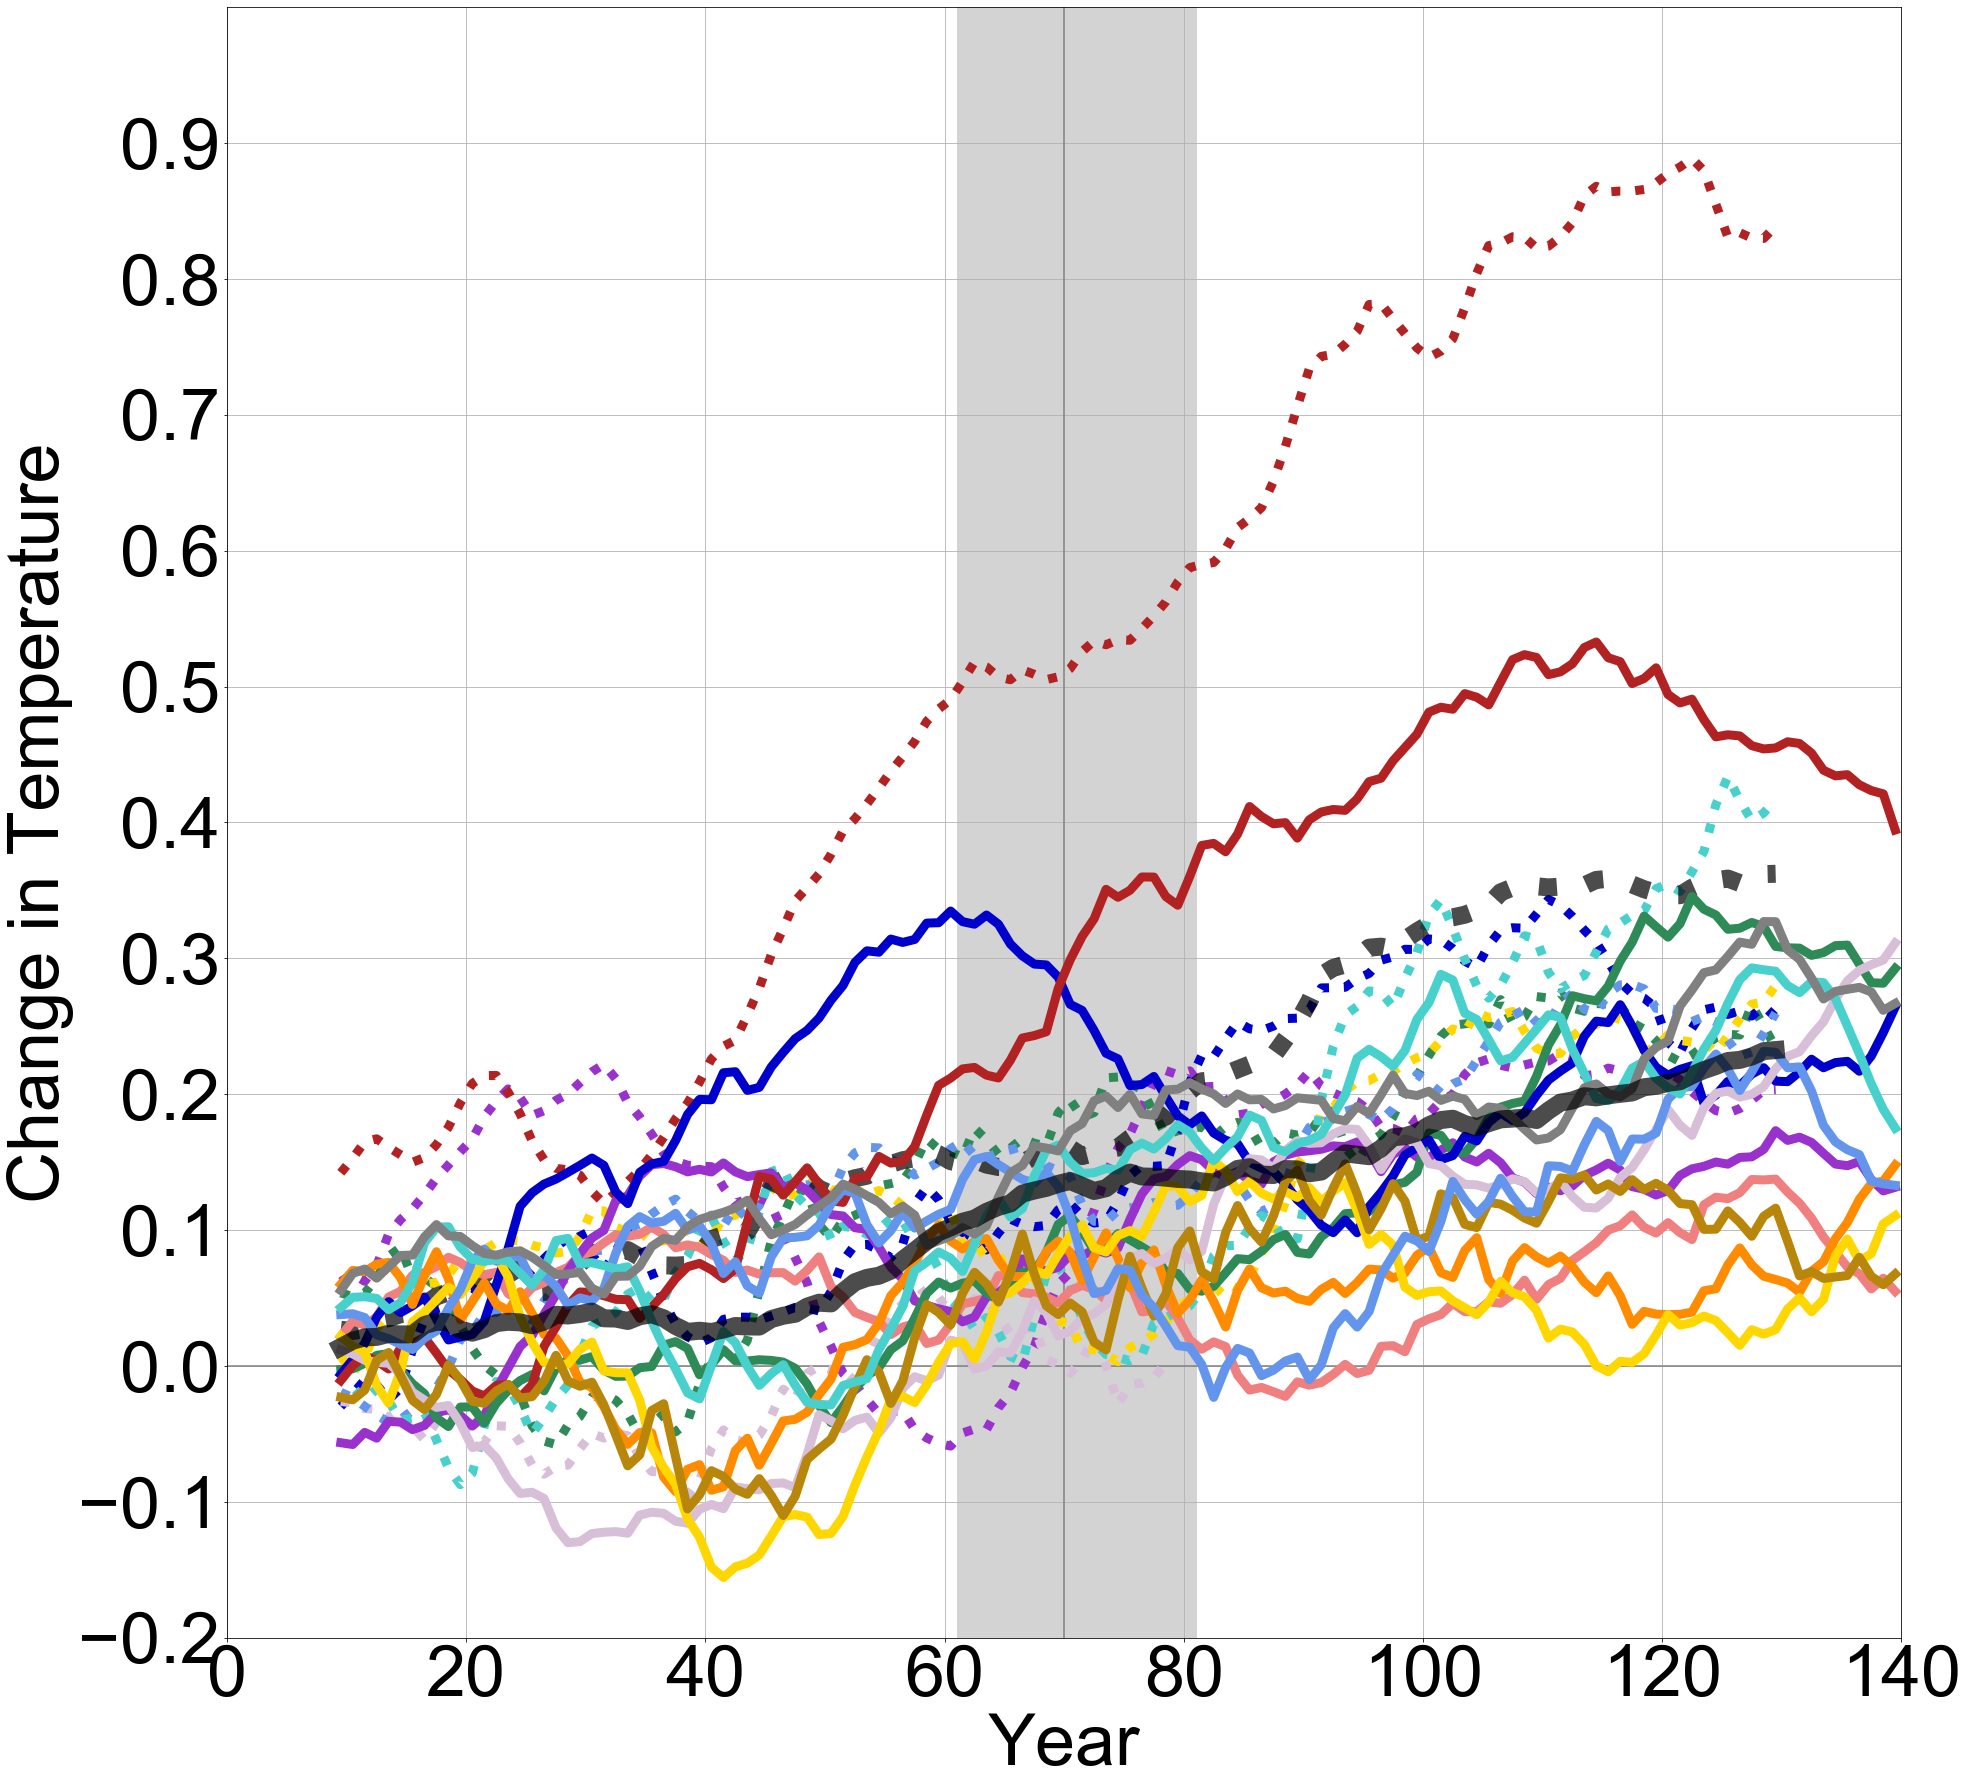

In [7]:
TCR_TYPE='TOT-RAD'
fig = plot_climate_response_timeseries.plot_climate_response_timeseries(averageType='global',
                                                                        tcr_type=TCR_TYPE,
                                                                        ylims=[-0.2,1],#[-0.5,7.0],
                                                                        plttitle='TempChange',
                                                                        tcr_dict=TCR_DICT,
                                                                        legend_on=False,
                                                                        num_legend_cols=7,
                                                                        dt=0.1,#0.5,
                                                                        fig_size=[30,30],
                                                                        x_axis_CO2=False,
                                                                        filepath=PATH_FIGURES+TCR_TYPE+'_TCR')#PATH_FIGURES+'Figure1a_TimeSeries_delta_T_phys')